<a href="https://colab.research.google.com/github/tswhy1/Aiffel_quest_cr/blob/main/Python/Node10_project/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [9]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [10]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [11]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [12]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [14]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

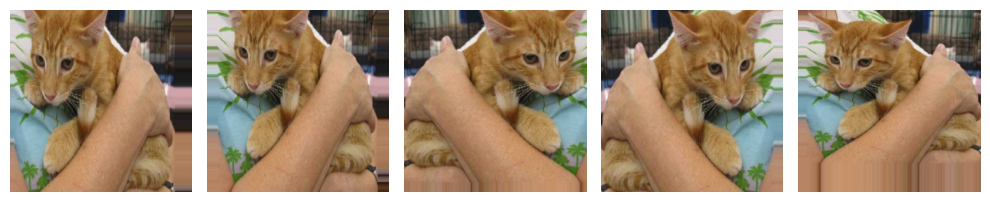

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [20]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [23]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


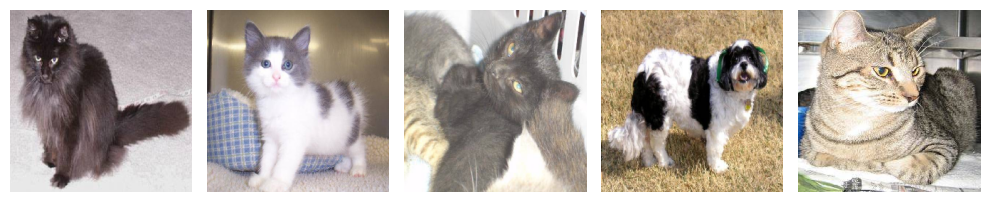

In [24]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [25]:
_[:5] # 정답 데이터

array([0., 0., 0., 1., 0.], dtype=float32)

In [26]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.
input_layer = tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D(2, 2)(x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

In [27]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [28]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 124s 679ms/step - binary_accuracy: 0.5180 - loss: 223581072.0000 - val_binary_accuracy: 0.5000 - val_loss: 37.5444
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 37.5444
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 69s 394ms/step - binary_accuracy: 0.4909 - loss: 17.0536 - val_binary_accuracy: 0.5100 - val_loss: 0.7181
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5100 - val_loss: 0.7181
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 380ms/step - binary_accuracy: 0.5128 - loss: 0.7177 - val_binary_accuracy: 0.5000 - val_loss: 0.7294


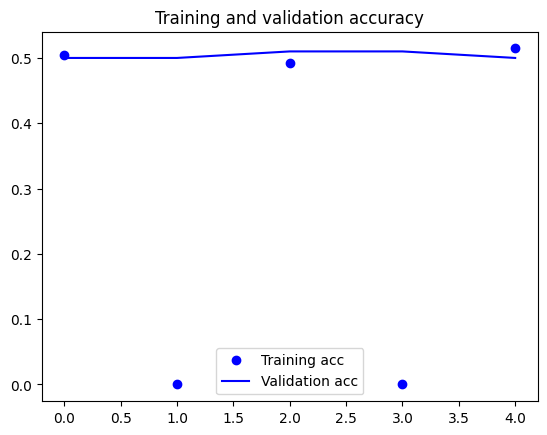

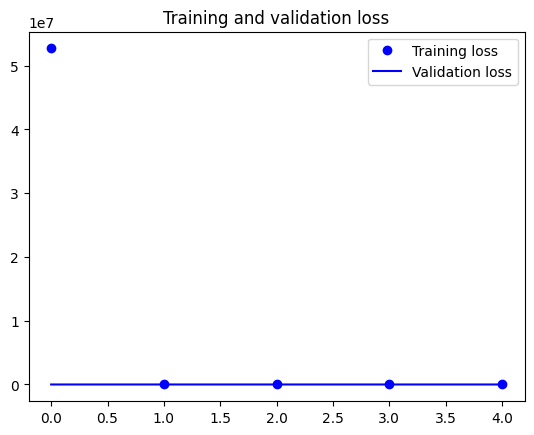

In [29]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# 문제 1-2. hyperparameter 설정
batch_size = 32
epochs = 20
IMG_HEIGHT = 224
IMG_WIDTH = 224
learning_rate = 0.0001

In [31]:
# 문제 1-2. 데이터 generator 생성
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
# 문제 1-2. 모델 구현
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trinable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=out_layer)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ['accuracy']

model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=metrics
)

In [35]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))//batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.5415 - loss: 0.7026 - val_accuracy: 0.6470 - val_loss: 0.6578
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5000 - loss: 0.6852 - val_accuracy: 0.6460 - val_loss: 0.6549
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 642ms/step - accuracy: 0.6362 - loss: 0.6288 - val_accuracy: 0.8570 - val_loss: 0.3472
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7188 - loss: 0.5410 - val_accuracy: 0.8650 - val_loss: 0.3304
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 603ms/step - accuracy: 0.8336 - loss: 0.4047 - val_accuracy: 0.9440 - val_loss: 0.1433
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9062 - loss: 0.2527 - val_accuracy: 0.8910 - val_loss: 0.2674
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 611ms/step - accuracy: 0.8786 - loss: 0.2703 - val_accuracy: 0.9390 - val_loss: 0.1513
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 0.92

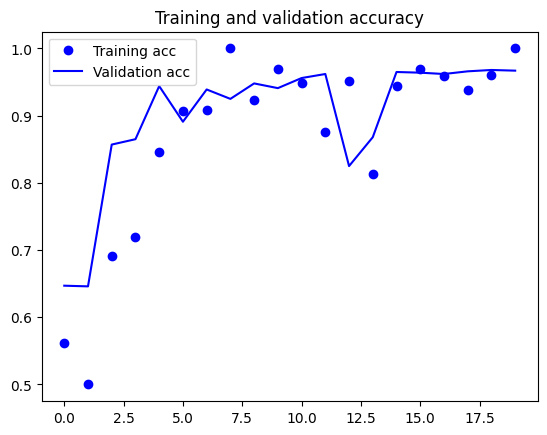

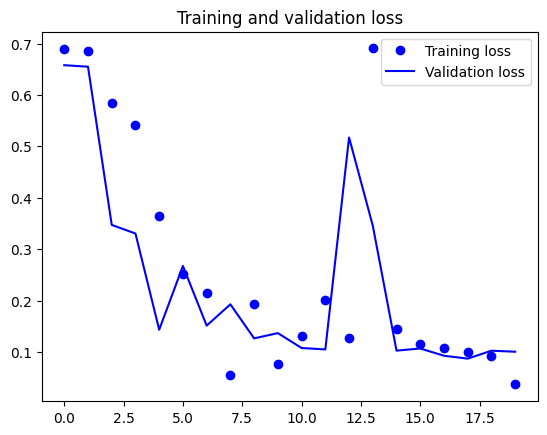

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()